In [43]:
%pip install numpy==1.21.4 pandas matplotlib seaborn sklearn scikit prettytable Axes3D threadpoolctl==3.1.0

  Using cached numpy-1.21.4-cp39-cp39-win_amd64.whl (14.0 MB)



ERROR: Could not find a version that satisfies the requirement scikit (from versions: none)
ERROR: No matching distribution found for scikit


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
np.__version__ 

'1.24.1'

In [46]:
df = pd.read_csv('data/mall.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [48]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [49]:
df.drop(["CustomerID"], axis = 1, inplace=True)

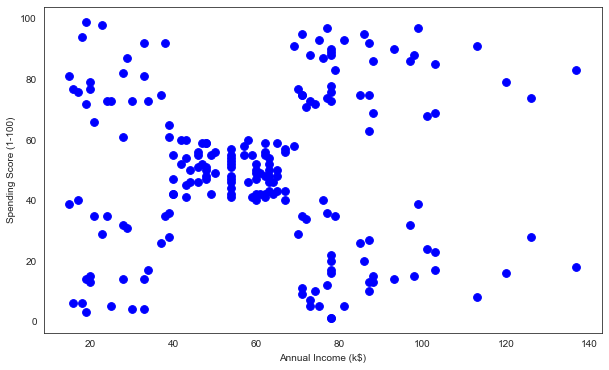

In [50]:
# Drop the 'Age' column
df_2d = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Create a new figure for the 2D scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot in 2D
plt.scatter(df_2d['Annual Income (k$)'],
            df_2d['Spending Score (1-100)'], c='blue', s=60)

# Set plot labels
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

# Show the 2D scatter plot
plt.show()


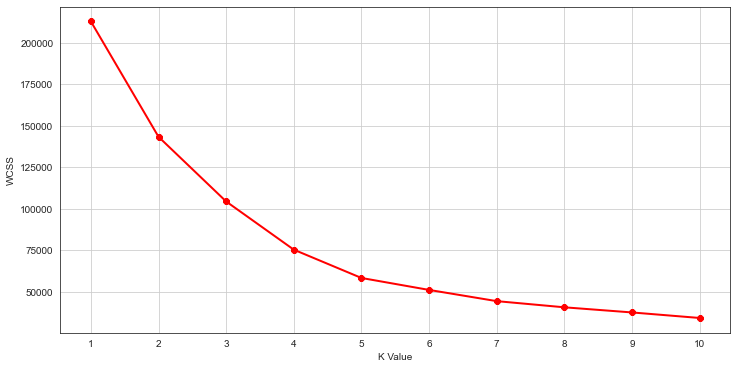

In [51]:
from sklearn.cluster import KMeans

wcss = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:, 1:])
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("WCSS")
plt.show()


In [52]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])

df["label"] = clusters

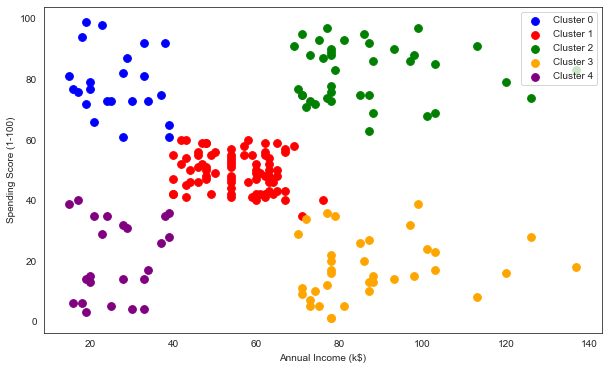

In [53]:
# Assuming you already have the 'df' DataFrame and 'clusters' from K-Means clustering

# Create a new figure for the 2D scatter plot
plt.figure(figsize=(10, 6))

# Define the colors for each cluster
colors = ['blue', 'red', 'green', 'orange', 'purple']

# Scatter plot for each cluster
for cluster_label, color in zip(range(5), colors):
    plt.scatter(df["Annual Income (k$)"][df.label == cluster_label], df["Spending Score (1-100)"]
                [df.label == cluster_label], c=color, s=60, label=f'Cluster {cluster_label}')

# Set plot labels and legend
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(loc='upper right')

# Show the 2D scatter plot
plt.show()
